In [152]:
import mtgstats.scryfall.api as api
import mtgstats.cards as c
import pandas as pd
import matplotlib.pyplot as plt

In [205]:
stats = {}

In [236]:
query = api.search('t:creature sort:edhrec', limit=100)
cards = c.parse_cards(query)
data = pd.DataFrame(cards)

Making request to https://api.scryfall.com/cards/search?q=t:creature sort:edhrec


In [237]:
data.head()

,name,mana_cost,cmc,type_line,oracle_text,power,toughness,colors,color_identity,keywords,rarity,edhrec_rank
0,Solemn Simulacrum,{4},4.0,Artifact Creature — Golem,"When Solemn Simulacrum enters the battlefield,...",2,2,[],[],[],rare,20
1,Sakura-Tribe Elder,{1}{G},2.0,Creature — Snake Shaman,Sacrifice Sakura-Tribe Elder: Search your libr...,1,1,[G],[G],[],common,36
2,Eternal Witness,{1}{G}{G},3.0,Creature — Human Shaman,"When Eternal Witness enters the battlefield, y...",2,1,[G],[G],[],uncommon,37
3,Llanowar Elves,{G},1.0,Creature — Elf Druid,{T}: Add {G}.,1,1,[G],[G],[],common,47
4,Birds of Paradise,{G},1.0,Creature — Bird,Flying\n{T}: Add one mana of any color.,0,1,[G],[G],[Flying],rare,58


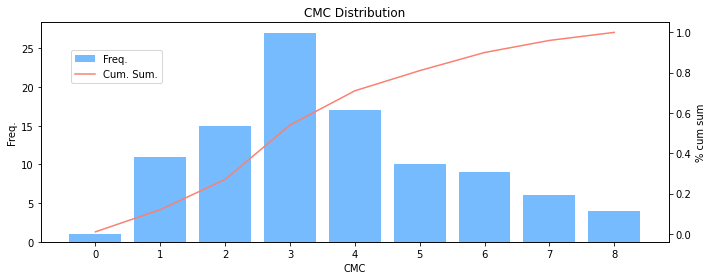

In [238]:
fig, ax = plt.subplots(figsize = (10,4))

bins = range(int(data.cmc.max())+1)
freqs = data.cmc.value_counts().sort_index()

ax.set(
    title='CMC Distribution',
    xlabel = 'CMC',
    ylabel = 'Freq.',
    xticks = bins
)

cumsum_ax = ax.twinx()
cumsum_ax.set(
    ylabel = '% cum sum'
)

ax.bar(bins, freqs, label="Freq.", color='xkcd:sky blue')
cumsum_ax.plot(bins, freqs.cumsum()/len(data), c='salmon', label='Cum. Sum.')

fig.legend(loc=(.1, .7))

fig.tight_layout()

In [239]:
stats['cmc'] = { 
    'freq': {cmc: freq for cmc, freq in zip(bins, freqs)},
    'cumsum' : {cmc: s for cmc, s in zip(bins, freqs.cumsum())}
}

In [240]:
stats

{'cmc': {'freq': {0: 1, 1: 11, 2: 15, 3: 27, 4: 17, 5: 10, 6: 9, 7: 6, 8: 4},
  'cumsum': {0: 1, 1: 12, 2: 27, 3: 54, 4: 71, 5: 81, 6: 90, 7: 96, 8: 100}}}

In [241]:
colors = {
    'W': 0,
    'U': 0,
    'B': 0,
    'R': 0,
    'G': 0,
    'C': 0
}

for card in cards:
    try:
        if len(card['colors']) == 0:
            colors['C'] += 1
        for color in colors.keys():
            if color in card['colors']:
                colors[color] += 1
    except:
        print(card['name'])
            
colors_freq = pd.Series(colors)
colors_freq = colors_freq.sort_values(ascending=False)

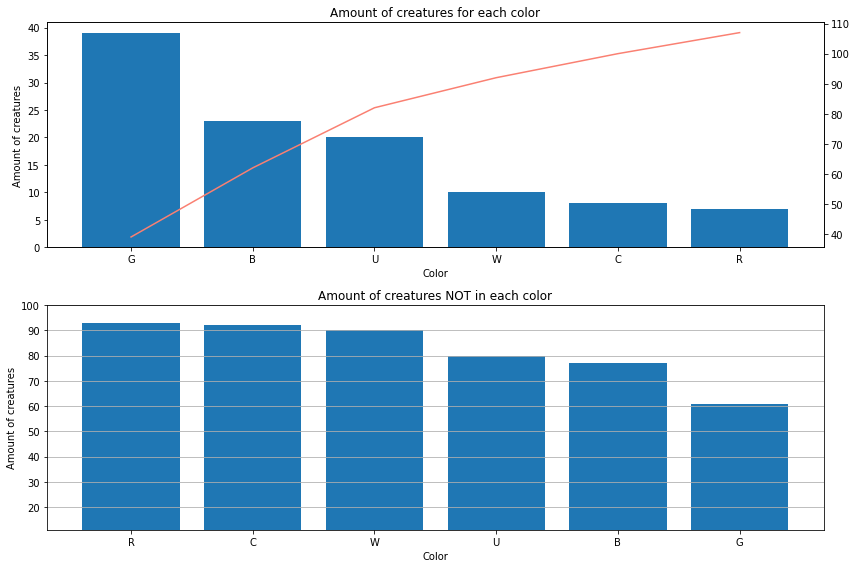

In [242]:
fig, (ax, ax_2) = plt.subplots(nrows=2, figsize=(12,8))

ax.set(
    title='Amount of creatures for each color',
    xlabel='Color',
    ylabel='Amount of creatures'
)

# Since there are multicolored creatures, the cumulative sum will exceed the total number of cards
# as they count for all of their colors
cumsum_ax = ax.twinx()
cumsum_ax.plot(colors_freq.cumsum(), c='salmon')

ax.bar(colors_freq.index, colors_freq)


# The number of creatures not of each color is the total minus the amount of creatures in that color
not_in_color = (len(data) - colors_freq).sort_values(ascending=False)

ax_2.set(
    title = 'Amount of creatures NOT in each color',
    xlabel='Color',
    ylabel='Amount of creatures',
    ylim=(min(not_in_color) - len(data)/2,len(data))
)

ax_2.grid(axis='y')
ax_2.bar(not_in_color.index, not_in_color)

fig.tight_layout()